In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
price_data = pd.read_csv("data/Automobile price data.csv")
price_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cols = ["price", "bore", "stroke", "horsepower", "peak-rpm"]
#Replacing "?" with NaN
for column in cols:
    price_data.loc[price_data[column]=="?", column] = np.nan
price_data.dropna(axis = 0, inplace=True) # in-place imp. so its not a copy

for column in cols:
    price_data[column] = pd.to_numeric(price_data[column])

In [4]:
price_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
price_data["city-mpg"].dtype
price_data["price"].dtype

dtype('int64')

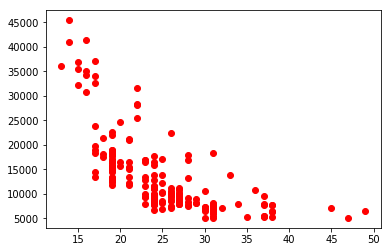

In [6]:
plt.plot(price_data["city-mpg"], price_data["price"], "ro")

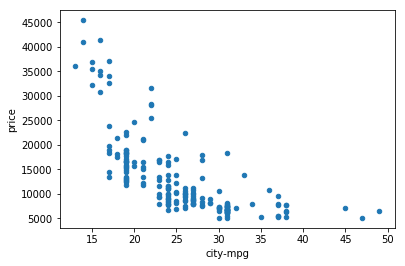

In [7]:
price_data.plot(kind="scatter", x="city-mpg", y="price")

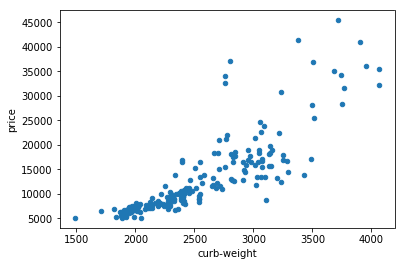

In [8]:
price_data.plot(kind="scatter", x='curb-weight', y = "price")

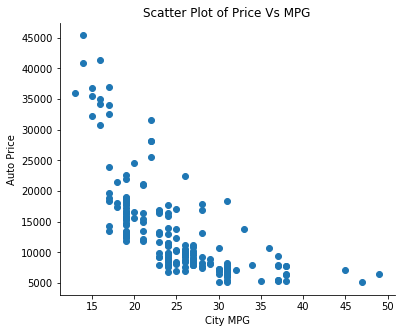

In [9]:
fig,ax = plt.subplots(figsize=(6,5))
ax.scatter(price_data["city-mpg"], price_data["price"])
ax.set_title("Scatter Plot of Price Vs MPG")
ax.set_xlabel("City MPG")
ax.set_ylabel("Auto Price")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

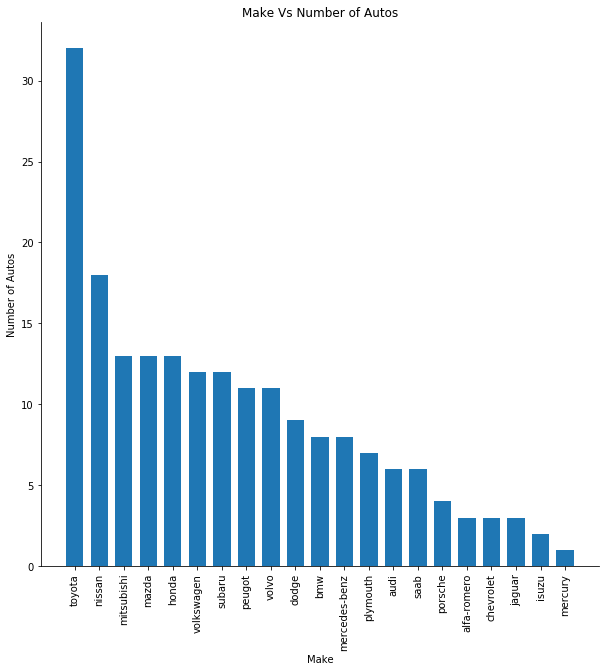

In [10]:
#Bar Chat /
from numpy import arange
car_maker = price_data["make"].value_counts()
maker_names = ['toyota', 'nissan', 'mitsubishi', 'mazda', 'honda', 'volkswagen',
       'subaru', 'peugot', 'volvo', 'dodge', 'bmw', 'mercedes-benz',
       'plymouth', 'audi', 'saab', 'porsche', 'alfa-romero', 'chevrolet',
       'jaguar', 'isuzu', 'mercury']
fig, ax = plt.subplots(figsize=(10,10))
bar_pos = arange(len(car_maker)) + 0.75
bar_heights = car_maker.values
ax.bar(bar_pos,bar_heights, 0.7)
ax.set_xticks(bar_pos)
ax.set_title("Make Vs Number of Autos")
ax.set_xlabel("Make")
ax.set_ylabel("Number of Autos")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xticklabels(maker_names, rotation=90)
#print(maker_names)
plt.show()

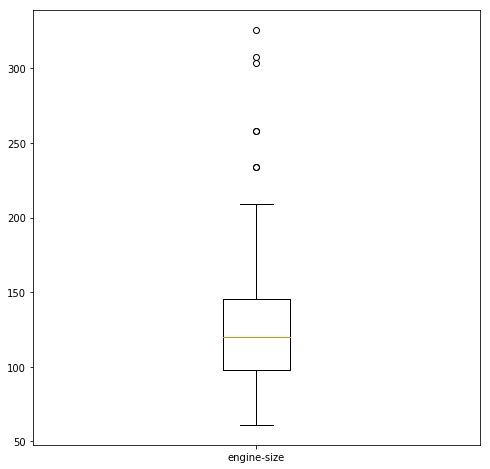

In [22]:
#Box-plot
fig, ax = plt.subplots(figsize=(8,8))
ax.boxplot(price_data['engine-size'].values)
xlabel = ["engine-size"]
ax.set_xticklabels(xlabel)

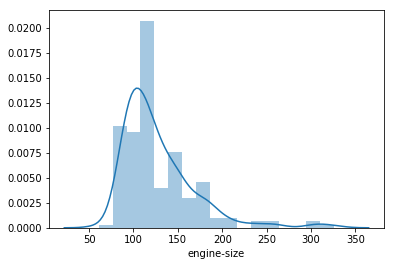

In [27]:
#KDE engine size
import seaborn as sns
sns.distplot(price_data["engine-size"])
plt.show()

In [13]:
#KDE engine size and price - an alternative solution to overplotting

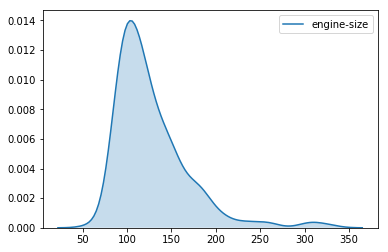

In [26]:
sns.kdeplot(price_data["engine-size"], shade=True)
plt.show()